# Multiple Classifiers

Predict the the following attributes from a pubmed abstract of a clinical trial:

- intervention_model
- primary_purpose
- gender
- healthy_volunteers

In [ ]:
%store -r abstracts_targets

df = abstracts_targets

df.info()

### Word Cloud

In [5]:
import wordcloud

def word_cloud(words, axes, title):
    wc = wordcloud.WordCloud().generate(words)
    axes.imshow(wc)
    axes.axis('off')
    plt.title(title)

### Fit and Transform

In [46]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

def train_and_go(df, target):
    """Training and Plotting
    
    - Filter away abstracts which don't have a label for the target
    - Vectorize the remaining abstracts
    - Train/test split
    - Train model
    - Predict
    - Confusion matrix
    - Features with highest coefficients
    
    """
    # Filter away abstracts which don't have a label for the target
    df = df[df[target].notnull()]
    
    labels = np.sort(df[target].unique())

    # Vectorize remaining abstracts
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(df.abstract)
    
    # Train Test Split
    from sklearn.cross_validation import train_test_split
    X_train, X_test, ys_train, ys_test = train_test_split(X, df[target])
    X_train.shape, X_test.shape, ys_train.shape, ys_test.shape
    
    # Train model
    from sklearn import linear_model
    logreg = linear_model.LogisticRegression(C=1e5, class_weight='balanced', multi_class='multinomial', solver='lbfgs')
    logreg.fit(X_train, ys_train)

    # Prediction
    import sklearn
    predictions = logreg.predict(X_test)
    print '{} f1: {}'.format(target, sklearn.metrics.f1_score(lb.fit_transform(ys_test), lb.fit_transform(predictions), average='binary'))

    # Confusion Matrix
    confusion_matrix = sklearn.metrics.confusion_matrix(ys_test, predictions)
    fig = plt.figure()
    plt.clf()
    plt.imshow(confusion_matrix, cmap=plt.cm.Blues, interpolation='nearest')
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=90)
    plt.yticks(tick_marks, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    width = height = len(labels)
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(confusion_matrix[x][y]) if confusion_matrix[x][y] else '', xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')

    # Features with Highest Coefficients
    fig = plt.figure(figsize=(20, 20))
    plt.clf()
    for i, (weights, title) in enumerate(zip(logreg.coef_, labels), start=1):
        words = sorted(zip(weights, vectorizer.vocabulary_), reverse=True)[:20]
        words = ' '.join(word[1] for word in words)

        axes = fig.add_subplot(4, 2, i)
        word_cloud(words, axes, title)

    plt.axis('off')
    plt.show()

### Train Classifiers

healthy_volunteers f1: 0.9410430839


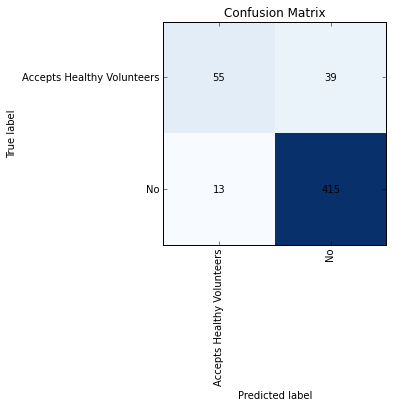

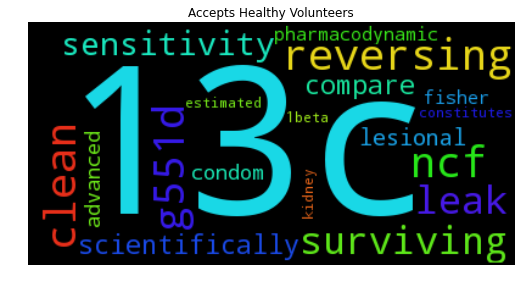

gender f1: 0.917905669125


/home/ebanner/.anaconda/envs/py27/lib/python2.7/site-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


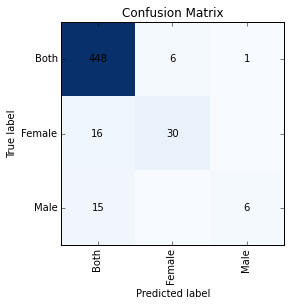

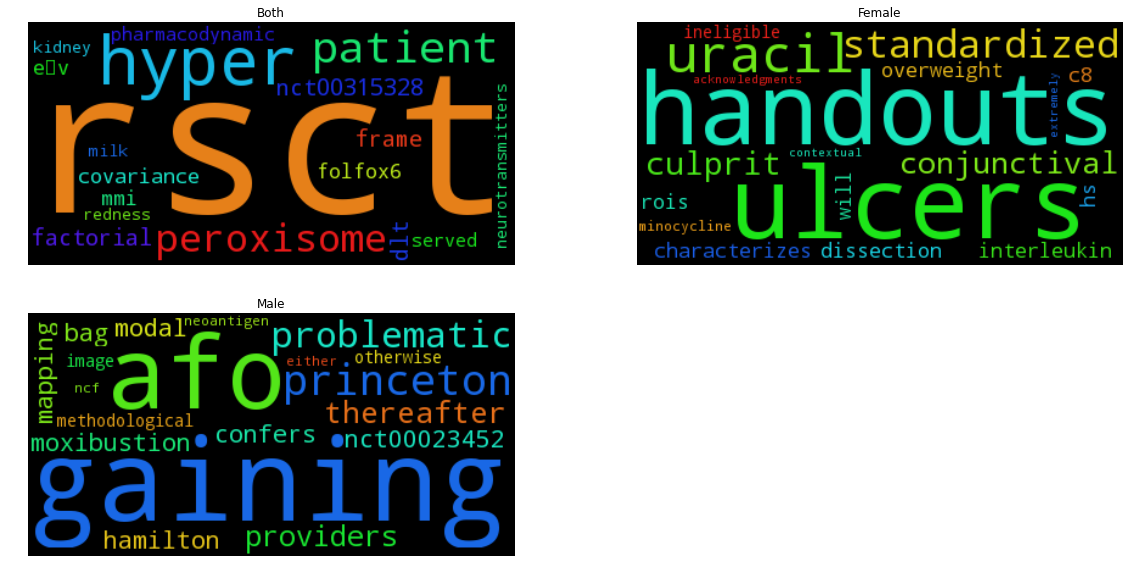

primary_purpose f1: 0.804984896158


/home/ebanner/.anaconda/envs/py27/lib/python2.7/site-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


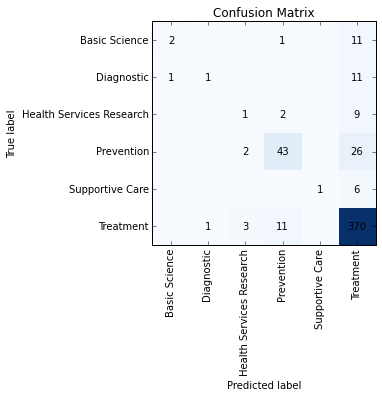

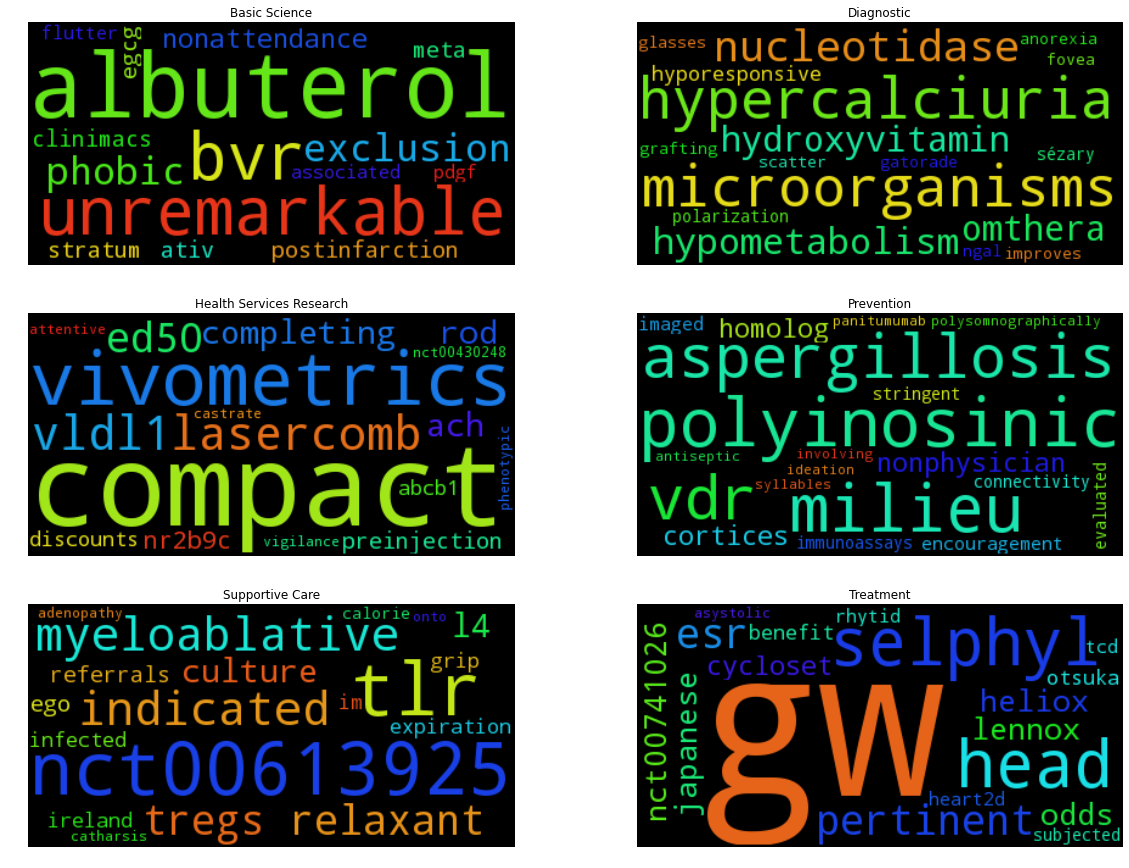

intervention_model f1: 0.751623766116


/home/ebanner/.anaconda/envs/py27/lib/python2.7/site-packages/sklearn/metrics/classification.py:676: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


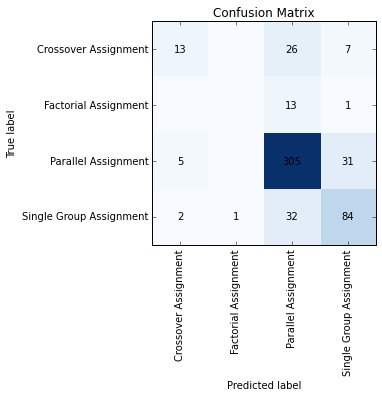

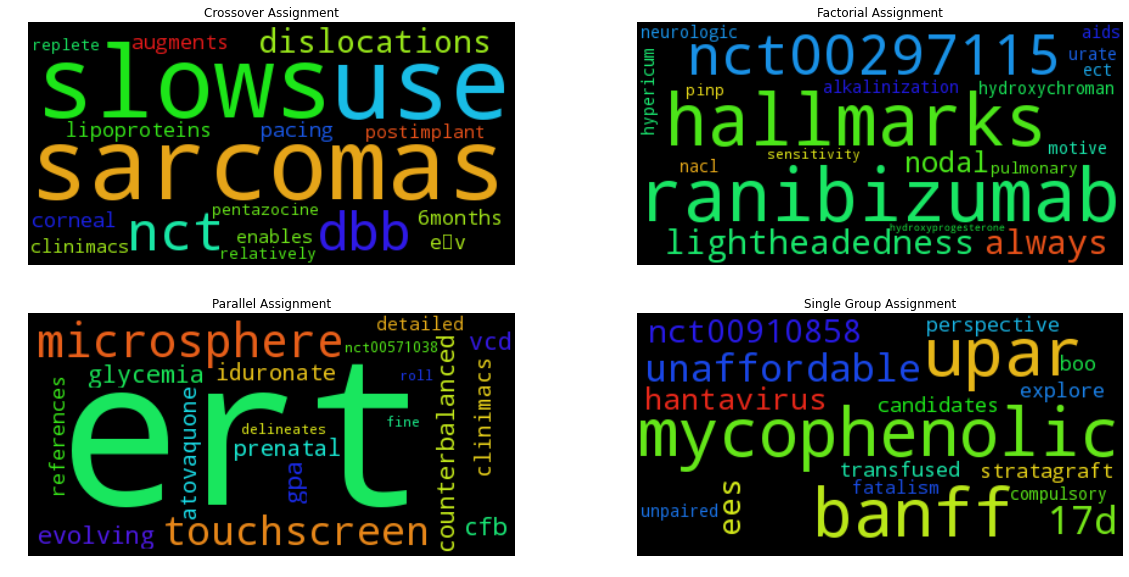

In [47]:
df[df.primary_purpose == 'Screening'] = None # this class is causing us all sorts of trouble

for target in ('healthy_volunteers', 'gender', 'primary_purpose', 'intervention_model'):
    train_and_go(df, target)